<a href="https://colab.research.google.com/github/vahedshaik/cmpe258_neural_networks/blob/main/Asst3_part_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

e) Build the same using Tensorflow various variants low level, api, functional, model, builtin 

In [ ]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers.legacy import SGD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Generate non-linear data and Initialize weights and bias

n = 1000
dim = 3
x = tf.random.uniform([n, dim], dtype=tf.float32)
print('Input shape =', x.shape)
weights = tf.transpose(tf.Variable([[2.5, -3.5, 7.0]], dtype=tf.float32))
bias = tf.Variable([8], dtype=tf.float32)
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)
y_true = tf.einsum('ij, jk -> ik', (x**3),  weights) + tf.einsum('ij, jk -> ik', (x**2),  weights) + tf.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Input shape = (1000, 3)
Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (1000, 1)


# Hyperparamter initializations

In [ ]:
input_dim = dim
output_dim = 1
hidden_dim = 32

learning_rate = 0.01
num_epochs = 100

#### Non-linear regression using tensorflow low level API

In [ ]:
# Weights and biases for each of the layers
W1 = tf.Variable(tf.random.normal([input_dim, hidden_dim]))
b1 = tf.Variable(tf.zeros([hidden_dim]))
W2 = tf.Variable(tf.random.normal([hidden_dim, hidden_dim]))
b2 = tf.Variable(tf.zeros([hidden_dim]))
W3 = tf.Variable(tf.random.normal([hidden_dim, output_dim]))
b3 = tf.Variable(tf.zeros([output_dim]))

# Forward pass
def forward(X):
  h1 = tf.nn.relu(tf.matmul(tf.convert_to_tensor(x), W1) + b1)
  h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)
  y_pred = tf.matmul(h2, W3) + b3
  return y_pred

# Loss function
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

# define the optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# define the training step
def train(x, y_true):
  with tf.GradientTape() as tape:
    y_pred = forward(x)
    loss_value = loss(y_true, y_pred)
  gradients = tape.gradient(loss_value, [W1, b1, W2, b2, W3, b3])
  optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
  return loss_value

# train the model
loss_ = []
for epoch in range(num_epochs):
    loss_value = train(x, y_true)
    loss_.append(loss_value)
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 796.2498168945312
Epoch 1: Loss = 129.65176391601562
Epoch 2: Loss = 4802.58935546875
Epoch 3: Loss = 48.54043960571289
Epoch 4: Loss = 96.4209213256836
Epoch 5: Loss = 3252.509521484375
Epoch 6: Loss = 241.4791259765625
Epoch 7: Loss = 54945.51953125
Epoch 8: Loss = 382.01214599609375
Epoch 9: Loss = 355.1387634277344
Epoch 10: Loss = 283.9225769042969
Epoch 11: Loss = 196.23751831054688
Epoch 12: Loss = 80.98712921142578
Epoch 13: Loss = 43.503231048583984
Epoch 14: Loss = 53.88423156738281
Epoch 15: Loss = 49.20515060424805
Epoch 16: Loss = 79.8595199584961
Epoch 17: Loss = 37.68975830078125
Epoch 18: Loss = 50.58298873901367
Epoch 19: Loss = 38.96995544433594
Epoch 20: Loss = 65.63938903808594
Epoch 21: Loss = 32.78813934326172
Epoch 22: Loss = 51.77451705932617
Epoch 23: Loss = 32.66557312011719
Epoch 24: Loss = 57.84775924682617
Epoch 25: Loss = 26.1060733795166
Epoch 26: Loss = 43.25871658325195
Epoch 27: Loss = 27.078603744506836
Epoch 28: Loss = 51.068710327148

# Plot epoch vs loss

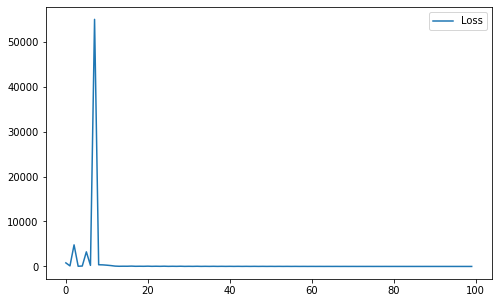

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

#### Using builtin layers

In [ ]:
class Linear(Layer):
  def __init__(self, units):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.wts = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
      self.bias = self.add_weight(shape=(self.units,), initializer='random_normal', trainable=True)

  def call(self, inputs):
      return tf.einsum('ij, jk -> ik', inputs, self.wts) + self.bias

In [ ]:
class Model(Layer):
  def __init__(self):
      super(Model, self).__init__()
      self.input_layer = Linear(input_dim)
      self.hidden_1 = Linear(hidden_dim)
      self.hidden_2 = Linear(hidden_dim)
      self.output_layer = Linear(output_dim)

  def call(self, input, training=None):
      x = self.input_layer(input)
      x = tf.nn.relu(x)
      x = self.hidden_1(x)
      x = tf.nn.relu(x)
      x = self.hidden_2(x)
      x = tf.nn.relu(x)
      x = self.output_layer(x)
      return x

In [ ]:
# Initialize model and train
model = Model()
y_pred = model(x, training=True)

#### Using tensorflow functional API

In [ ]:
# (Functional API)

x_ = tf.keras.layers.Input(shape=(input_dim,))
h1 = tf.keras.layers.Dense(hidden_dim, activation='relu')(x_)
h2 = tf.keras.layers.Dense(hidden_dim, activation='relu')(h1)
y = tf.keras.layers.Dense(output_dim, activation=None)(h2)

In [ ]:
# Define optimizer and loss function

optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model = tf.keras.Model(inputs=x_, outputs=y)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile and fit model

model.compile(optimizer=optimizer, loss=loss)
model.fit(x, y_true, epochs=num_epochs)
y_pred = model.predict(x)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 59.9816
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 24.5748
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 11.3011
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8768
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2222
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8948
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7353
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8423
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4285
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9282
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1550
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 3.3586
Epoch 13/100
32/32 [==============

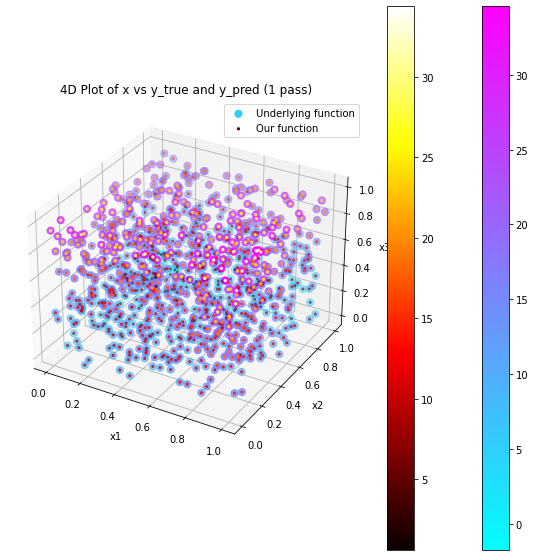

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

#### Using tensoflow high level API - Keras

In [ ]:
# Non-linear regression model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_dim, input_dim=input_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(hidden_dim, activation=tf.nn.relu),
    tf.keras.layers.Dense(output_dim, activation=None)
])

In [ ]:
# Define optimizer and loss function

optimizer = SGD(lr=learning_rate)
loss = tf.keras.losses.MeanSquaredError()

In [ ]:
# Compile and train the model
model.compile(optimizer=optimizer, loss=loss)
history = model.fit(x, y_true, epochs=num_epochs)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 68.8531
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 11.6499
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0945
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 8.8332
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.7566
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0159
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7513
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1297
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.1324
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1190
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6341
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4349
Epoch 13/100
32/32 [===============

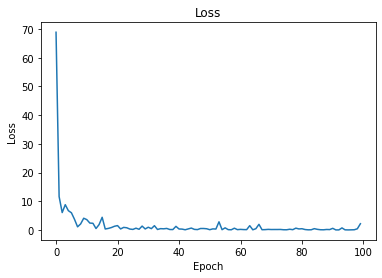

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()